In [25]:
%%bash

head -n 1 yelp_dataset_challenge_round9/yelp_academic_dataset_user.json

{"user_id":"EZmocAborM6z66rTzeZxzQ","name":"Rob","review_count":761,"yelping_since":"2009-09-12","friends":["iJg9ekPzF9lkMuvjKYX6uA","ctWAuzS04Xu0lke2Rop4lQ","B8CqppjOne8X4RSJ5KYOvQ","_K9sKlA4fVkWI4hyGSpoPA","Ec-epOsAWvjI6e90IlM8jw","r2UUCzGxqI6WPsiWPgqG2A","3ybkL7N63UdSn4wepINzUw","d-lzusSagnkDuiyLlfF5pw","Ydh2zA5wUlD-UbApp8toGA","DeZhnC-RsNFmKSlI0lUksw","NTuvVb-ZwQ_rFn6W9Krm7A","PCdUS3L8LhQOereIyQ6_RA","RYIhfaNekKLDuqmwqkVi3g","i-mQUeJVKqXscelJ7XjT2w","5T_2RWFzvf-nMZYD0RsvWg","DTo6vHKzyx8RmMrVbTgowg","kOUzW4porPxN0n54Z0eHMQ","x-lu6ZBVTjyHFvoq3f0K4w","8Gy1MJ4gCnOL8qiwD2ZGLQ","8esbQFK-w5xRMnQZvnaADg","YeEUeu7W3TM9PjBsGlyktg","EJ8pe71KG0UXb2SbI9ACKw","22KNmeq7zf3Mv8RwipstUA","UO8mDYLNOa3g9i2zmHnyuA","a-Ug_MFryz3utca-NaMkNQ","lfX4Ay6lYeWQ2kSdAxJaDg","kjSHVCJlFl6Zfgp72WJ0jQ","Z6V6xuIgxgVqqpFhphNTIQ","npSj4F1BCNGodni0e2SoVg","3DRVeLgbdM1GRBu7T3ydeQ","8-WGGF1n77oj2-izXqfvNA","_ZfdHYEwybT-iVwp9EX5cA","L01sjA8ajv8S18LMxi4JRg","2Bf7Q7pYbWgdNWwHM7o6Lg","O5UwGer9ouqAamU7pTWIpA","_jU64TfBR53dD4tW

In [68]:
%matplotlib inline
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

from time import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os; import json; import fileinput

fileinput.close() # sometimes fileinput is already active
def load_file(filename, transformer=None):
    data_dir = "yelp_dataset_challenge_round9"
    filepath = os.path.join(data_dir, filename)
    max_lines = 30000
    #headers = None
    data = []
    for line in fileinput.input(filepath):
        d = json.loads(line)
        #if not headers:
        #        headers = list(d.keys())
                
        if transformer:
            d = transformer(d)

        #row = list(d.values())
        data.append(d)
        if len(data) > max_lines: break
            
    fileinput.close()
    return pd.DataFrame(data)
    #return pd.DataFrame(data=data, columns=headers)

def transf_user(d):    
    d['n_friends'] = len(d['friends'])
    d['n_elite'] = len(d['elite'])
    del d['friends']
    del d['elite']
    #del d['compliment_writer']
    return d

df_user = load_file("yelp_academic_dataset_user.json", transf_user)
df_review = load_file("yelp_academic_dataset_review.json")
df_tip = load_file("yelp_academic_dataset_tip.json")

In [75]:
# are there other types?
#df_user[df_user['compliment_writer'] != 'user']
df_tip.head(3)

,business_id,date,likes,text,type,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,tip,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw


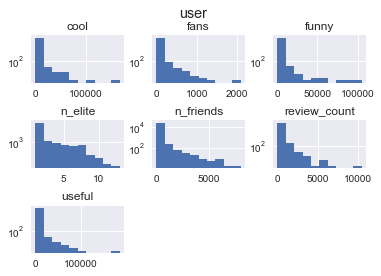

In [73]:
cols = ['review_count', 'n_friends', 'useful', 'funny', 'cool', 'fans', 'n_elite', 'type']
axes = df_user.hist(column=cols)
for i in axes:
    for ax in i:
        ax.set_yscale('log')

plt.subplots_adjust(hspace=0.8)
plt.suptitle('user')
plt.show()

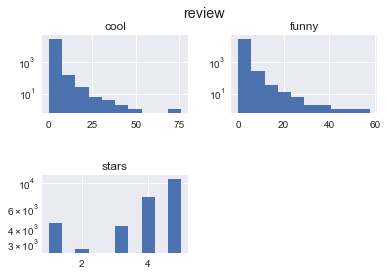

In [74]:
cols = ['stars', 'cool', 'funny']
axes = df_review.hist(column=cols)
for i in axes:
    for ax in i:
        ax.set_yscale('log')

plt.subplots_adjust(hspace=0.8)
plt.suptitle('review')
plt.show()